In [4]:
#importando biblioteca pandas
import pandas as pd

In [6]:
%pip install openpyxl

     -------------------------------------- 242.1/242.1 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


###Visualização de Dados
Nesta parte estamos analisando diferentes arquivos em Excel e iremos montar um df(dataframe) único com os dados das 5 planilhas.

In [7]:
df1 = pd.read_excel('Aracaju.xlsx')
df2 = pd.read_excel('Fortaleza.xlsx')
df3 = pd.read_excel('Natal.xlsx')
df4 = pd.read_excel('Recife.xlsx')
df5 = pd.read_excel('Salvador.xlsx')

Aqui estamos concatenando as planilhas

In [8]:
df = pd.concat([df1,df2,df3,df4,df5])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


Aqui estamos verificando o tipo de dados de cada coluna

In [9]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

Agora que oservamos o tipo de dados e estão todos em formato adequado iremos começar algumas análise a fim de treinar as ferramentas fornecidas pelo pandas.

1) Verificar se há valores faltantes na base de dados.

In [10]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

Esta base já havia sido tratada, mas colocarei aqui algumas opções de tratamento. São elas:

1)Substituindo os valores faltantes pela média.

Ex.: df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

obs.: Nem sempre isso faz sentido. Precisa observar o tipo de negócio, o range de valores (nesse caso) e a quantidade de valores faltantes. As vezes o melhor pode ser usar a mediana, por exemplo.

2)Substituindo os valores faltantes por zero.

ex.: df["Vendas"].fillna(0, inplace=True)

3)Apagando as linhas com valores faltantes. Nesse caso iremos toda linha que apresentar um valor faltante.

Ex.: df.dropna(inplace=True)

Obs.: Este talvez faça mais sentido na maioria dos casos pois não irá interferir na análise estatística.

4)Apagando as linhas com valores faltantes com base apenas em 1 coluna.

Ex.: df.dropna(subset=["Vendas"], inplace=True)

5)Removendo linhas que estejam com valores faltantes em todas as colunas.

Ex.: df.dropna(how="all", inplace=True)

Criando colunas novas.

In [11]:
df['Receita'] = df['Vendas'] * df['Qtde']

In [12]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
41,Salvador,2019-02-13,9.86,1035,2,19.72
83,Fortaleza,2019-01-01,3.88,1002,6,23.28
204,Salvador,2019-01-02,151.41,1037,2,302.82
107,Natal,2019-01-02,14.70,1035,1,14.70
42,Fortaleza,2019-01-01,38.71,1004,5,193.55
119,Salvador,2019-03-02,136.37,1034,2,272.74
126,Natal,2019-01-02,41.69,1036,2,83.38
108,Salvador,2019-03-02,11.72,1037,1,11.72
230,Natal,2019-01-03,184.69,1036,1,184.69
91,Fortaleza,2019-01-01,37.49,1002,1,37.49


Vamos analisar:

1) Receita por ano

2) Receita por filial

3) Receita por filial/ano

4) Se há um mês ou dia melhor para o faturamento da empresa e de cada unidade.

In [13]:
# receitas por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [14]:
# receita por filial
df.groupby(df['Cidade'])['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [15]:
# receita por filial por ano
df.groupby([df['Cidade'],df['Data'].dt.year])['Receita'].sum()

Cidade     Data
Aracaju    2018    46276.29
           2019     2471.96
Fortaleza  2019    37913.97
Natal      2018    71750.00
           2019    95477.52
Recife     2019    51936.51
Salvador   2018      150.24
           2019    40446.49
Name: Receita, dtype: float64

In [16]:
#Resetando o index
lucro_ano = df.groupby([df['Cidade'],df['Data'].dt.year])['Receita'].sum().reset_index()
lucro_ano


,Cidade,Data,Receita
0,Aracaju,2018,46276.29
1,Aracaju,2019,2471.96
2,Fortaleza,2019,37913.97
3,Natal,2018,71750.00
4,Natal,2019,95477.52
5,Recife,2019,51936.51
6,Salvador,2018,150.24
7,Salvador,2019,40446.49


In [17]:
#analisando se houve um mês melhor para o faturamento
mes_venda = df.groupby(df['Data'].dt.month)['Receita'].sum()
mes_venda

Data
1     188456.50
2      37244.47
3      67794.01
4      13586.00
5       8965.00
6       7097.00
7       4462.00
8       1212.00
9       5984.00
10      9680.00
11      1126.00
12       816.00
Name: Receita, dtype: float64

In [18]:
#analisando se houve um dia melhor para o faturamento
dia_venda = df.groupby(df['Data'].dt.day)['Receita'].sum()
dia_venda.sort_values(ascending=False)

Data
1     132810.21
2      84283.85
3      13464.02
20     10402.00
27     10304.00
10     10075.80
8       8522.00
14      8328.65
22      6242.00
13      6199.16
24      6086.00
11      5752.60
9       5737.00
7       5625.00
18      5476.00
21      5299.00
25      4438.00
12      4185.69
30      2760.00
28      2228.00
5       2130.00
23      1608.00
26      1506.00
16      1170.00
15       738.00
31       564.00
17       488.00
Name: Receita, dtype: float64

Vamos agora incluir mais algumas colunas para exercitar e depois gerar gráficos.

In [19]:
#nlargest - mostra as linhas com maior receita
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [20]:
#nsamllest - mostra as linhas com menor receita
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [22]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018


In [23]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [24]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
16,Recife,2019-01-01,19.95,980,8,159.60,2019,1,1
115,Recife,2019-03-02,12.23,981,3,36.69,2019,3,2
63,Salvador,2019-01-01,166.59,1036,1,166.59,2019,1,1
14,Recife,2019-01-12,102.91,982,3,308.73,2019,1,12
137,Recife,2019-03-02,51.99,983,3,155.97,2019,3,2


In [25]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [27]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [28]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
65,Natal,2019-04-05,292.00,852,2,584.00,2019,4,5,459 days,2
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
100,Recife,2019-01-01,35.11,982,4,140.44,2019,1,1,365 days,1
12,Aracaju,2019-01-01,9.78,1520,8,78.24,2019,1,1,365 days,1
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1,0 days,1


In [30]:
#Filtrando as vendas de 2019 do mês de março
# .loc localiza tudo que for igual a (df["Data"].dt.year == 2019) &(and) (df["Data"].dt.month == 3)
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


In [31]:
#quantidade de vendas realizadas por loja
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

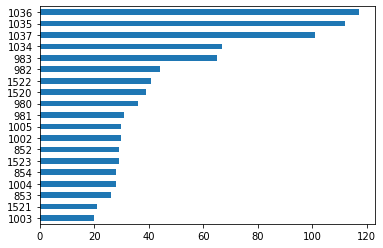

In [34]:
#vamos colocar isso em gráfico
#Gráfico de barras horizontais (barh)
#caso quiséssemos barras verticais (bar)
df["LojaID"].value_counts(ascending=True).plot.barh();

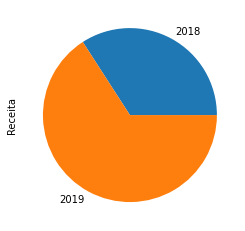

In [36]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

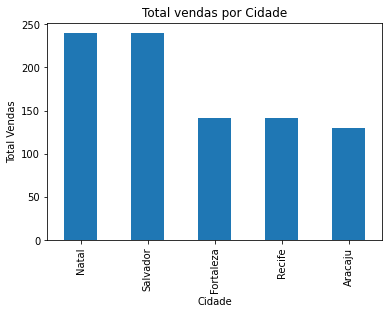

In [37]:
# total de vendas por cidade
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [38]:
#Alterando o estilo
plt.style.use("seaborn")

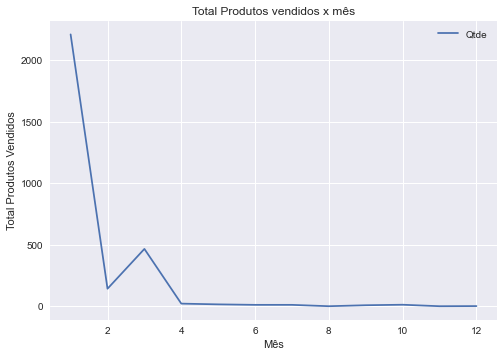

In [39]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [40]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

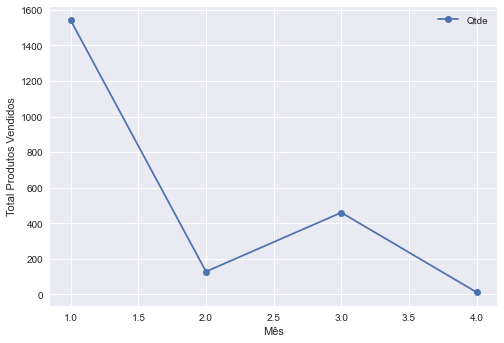

In [41]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

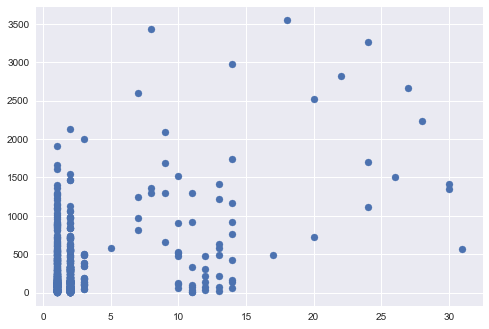

In [42]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

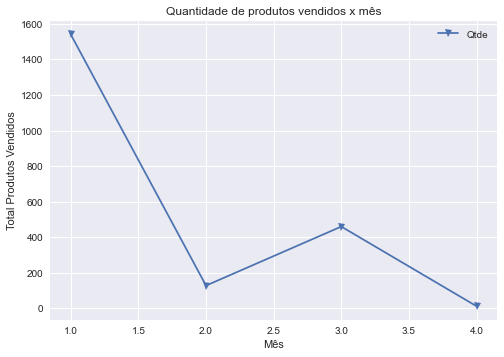

In [43]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")